In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
dataset1 = pd.read_csv("/Users/AldonaRoseMaria/Downloads/human_vital_signs_dataset_2024.csv")
dataset1.head()

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk


In [3]:
dataset1.shape

(200020, 17)

In [4]:
dataset2 = pd.read_csv("/Users/AldonaRoseMaria/Downloads/Health Monitor Dataset/Data-Table 1.csv")
dataset2.head()

,Dehydration,Medicine Overdose,Acidious,Cold,Cough,Dehydration.1,Medicine Overdose.1,Acidious.1,Cold .1,Cough.1,Type,Temperature,Heart Rate,Pulse,BPSYS,BPDIA,Respiratory Rate,Oxygen Saturation,PH,Causes Respiratory Imbalance
0,True,True,True,False,True,1,1,1,0,1,4,99,82,83,98,49,19,0.96,9,Chronic
1,True,True,False,False,False,1,1,0,0,0,2,101,194,172,102,71,10,0.96,13,Severe
2,False,True,False,False,True,0,1,0,0,1,2,104,77,146,97,64,19,0.94,3,Severe
3,False,False,False,False,False,0,0,0,0,0,0,99,64,62,113,76,14,0.99,0,Normal
4,True,False,True,True,False,1,0,1,1,0,3,106,172,124,97,90,49,0.92,12,Chronic


In [5]:
dataset2.shape

(4286, 20)

In [6]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient ID                200020 non-null  int64  
 1   Heart Rate                200020 non-null  int64  
 2   Respiratory Rate          200020 non-null  int64  
 3   Timestamp                 200020 non-null  object 
 4   Body Temperature          200020 non-null  float64
 5   Oxygen Saturation         200020 non-null  float64
 6   Systolic Blood Pressure   200020 non-null  int64  
 7   Diastolic Blood Pressure  200020 non-null  int64  
 8   Age                       200020 non-null  int64  
 9   Gender                    200020 non-null  object 
 10  Weight (kg)               200020 non-null  float64
 11  Height (m)                200020 non-null  float64
 12  Derived_HRV               200020 non-null  float64
 13  Derived_Pulse_Pressure    200020 non-null  i

In [7]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Dehydration                   4286 non-null   bool   
 1   Medicine Overdose             4286 non-null   bool   
 2   Acidious                      4286 non-null   bool   
 3   Cold                          4286 non-null   bool   
 4   Cough                         4286 non-null   bool   
 5   Dehydration.1                 4286 non-null   int64  
 6   Medicine Overdose.1           4286 non-null   int64  
 7   Acidious.1                    4286 non-null   int64  
 8   Cold .1                       4286 non-null   int64  
 9   Cough.1                       4286 non-null   int64  
 10  Type                          4286 non-null   int64  
 11  Temperature                   4286 non-null   int64  
 12  Heart Rate                    4286 non-null   int64  
 13  Pul

In [8]:
dataset1.rename(columns={
    'Heart Rate': 'HeartRate',
    'Respiratory Rate': 'RespiratoryRate',
    'Oxygen Saturation': 'OxygenSaturation',
    'Body Temperature': 'BodyTemperature',
    'Systolic Blood Pressure': 'BPSYS',
    'Diastolic Blood Pressure': 'BPDIA'
}, inplace=True)

dataset2.rename(columns={
    'Temperature': 'BodyTemperature',
    'Heart Rate': 'HeartRate',
    'Respiratory Rate': 'RespiratoryRate',
    'Oxygen Saturation': 'OxygenSaturation',

}, inplace=True)

print(dataset1.columns)
print(dataset2.columns)

Index(['Patient ID', 'HeartRate', 'RespiratoryRate', 'Timestamp',
       'BodyTemperature', 'OxygenSaturation', 'BPSYS', 'BPDIA', 'Age',
       'Gender', 'Weight (kg)', 'Height (m)', 'Derived_HRV',
       'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP',
       'Risk Category'],
      dtype='object')
Index(['Dehydration', 'Medicine Overdose', 'Acidious', 'Cold ', 'Cough',
       'Dehydration.1', 'Medicine Overdose.1', 'Acidious.1', 'Cold .1',
       'Cough.1', 'Type', 'BodyTemperature', 'HeartRate', 'Pulse', 'BPSYS',
       'BPDIA', 'RespiratoryRate', 'OxygenSaturation', 'PH',
       'Causes Respiratory Imbalance'],
      dtype='object')


In [9]:
#Mean Arterial Pressure
dataset1['MAP'] = (dataset1['BPSYS'] + 2 * dataset1['BPDIA']) / 3
dataset2['MAP'] = (dataset2['BPSYS'] + 2 * dataset2['BPDIA']) / 3

### Data Integration

In [10]:
common_columns = dataset1.columns.intersection(dataset2.columns)
common_columns

Index(['HeartRate', 'RespiratoryRate', 'BodyTemperature', 'OxygenSaturation',
       'BPSYS', 'BPDIA', 'MAP'],
      dtype='object')

In [11]:
dataset1_common = dataset1[common_columns]
dataset2_common = dataset2[common_columns]

dataset = pd.concat([dataset1_common, dataset2_common], axis=0)
dataset

,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation,BPSYS,BPDIA,MAP
0,60,12,36.861707,95.702046,124,86,98.666667
1,63,18,36.511633,96.689413,126,84,98.000000
2,63,15,37.052049,98.508265,131,78,95.666667
3,99,16,36.654748,95.011801,118,72,87.333333
4,69,16,36.975098,98.623792,138,76,96.666667
...,...,...,...,...,...,...,...
4281,137,39,103.000000,0.950000,99,41,60.333333
4282,112,56,102.000000,0.900000,101,62,75.000000
4283,106,35,104.000000,0.960000,106,77,86.666667
4284,98,56,95.000000,0.910000,103,77,85.666667


In [12]:
def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

In [13]:
def hr_category(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

In [14]:
def oxy_category(oxy):
    if oxy < 94:
        return 'Low'
    else:
        return 'Normal'

In [15]:
dataset.reset_index()

,index,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation,BPSYS,BPDIA,MAP
0,0,60,12,36.861707,95.702046,124,86,98.666667
1,1,63,18,36.511633,96.689413,126,84,98.000000
2,2,63,15,37.052049,98.508265,131,78,95.666667
3,3,99,16,36.654748,95.011801,118,72,87.333333
4,4,69,16,36.975098,98.623792,138,76,96.666667
...,...,...,...,...,...,...,...,...
204301,4281,137,39,103.000000,0.950000,99,41,60.333333
204302,4282,112,56,102.000000,0.900000,101,62,75.000000
204303,4283,106,35,104.000000,0.960000,106,77,86.666667
204304,4284,98,56,95.000000,0.910000,103,77,85.666667


In [16]:
dataset['BPCategory'] = dataset.apply(lambda x: bp_category(x['BPSYS'], x['BPDIA']), axis=1)
dataset['HRCategory'] = dataset['HeartRate'].apply(hr_category)
dataset['OxyCategory'] = dataset['OxygenSaturation'].apply(oxy_category)

dataset

,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation,BPSYS,BPDIA,MAP,BPCategory,HRCategory,OxyCategory
0,60,12,36.861707,95.702046,124,86,98.666667,Elevated,Normal,Normal
1,63,18,36.511633,96.689413,126,84,98.000000,Elevated,Normal,Normal
2,63,15,37.052049,98.508265,131,78,95.666667,Elevated,Normal,Normal
3,99,16,36.654748,95.011801,118,72,87.333333,Normal,Normal,Normal
4,69,16,36.975098,98.623792,138,76,96.666667,Elevated,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...
4281,137,39,103.000000,0.950000,99,41,60.333333,Normal,High,Low
4282,112,56,102.000000,0.900000,101,62,75.000000,Normal,High,Low
4283,106,35,104.000000,0.960000,106,77,86.666667,Normal,High,Low
4284,98,56,95.000000,0.910000,103,77,85.666667,Normal,Normal,Low


In [17]:
dataset.isnull().sum()

HeartRate           0
RespiratoryRate     0
BodyTemperature     0
OxygenSaturation    0
BPSYS               0
BPDIA               0
MAP                 0
BPCategory          0
HRCategory          0
OxyCategory         0
dtype: int64

In [18]:
dataset.describe()

,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation,BPSYS,BPDIA,MAP
count,204306.000000,204306.000000,204306.000000,204306.000000,204306.000000,204306.000000,204306.000000
mean,80.270281,15.775826,38.077719,95.478845,123.957564,79.294304,94.182057
std,13.967538,3.798395,9.103615,13.910678,9.205985,6.309826,5.397156
min,50.000000,6.000000,36.000004,0.900000,90.000000,40.000000,58.333333
25%,70.000000,13.000000,36.380741,96.178713,116.000000,74.000000,90.666667
50%,80.000000,16.000000,36.764101,97.454606,124.000000,79.000000,94.333333
75%,90.000000,18.000000,37.147431,98.730159,132.000000,84.000000,98.000000
max,200.000000,60.000000,106.000000,99.999963,139.000000,100.000000,105.666667


In [19]:
print(dataset.shape)

(204306, 10)


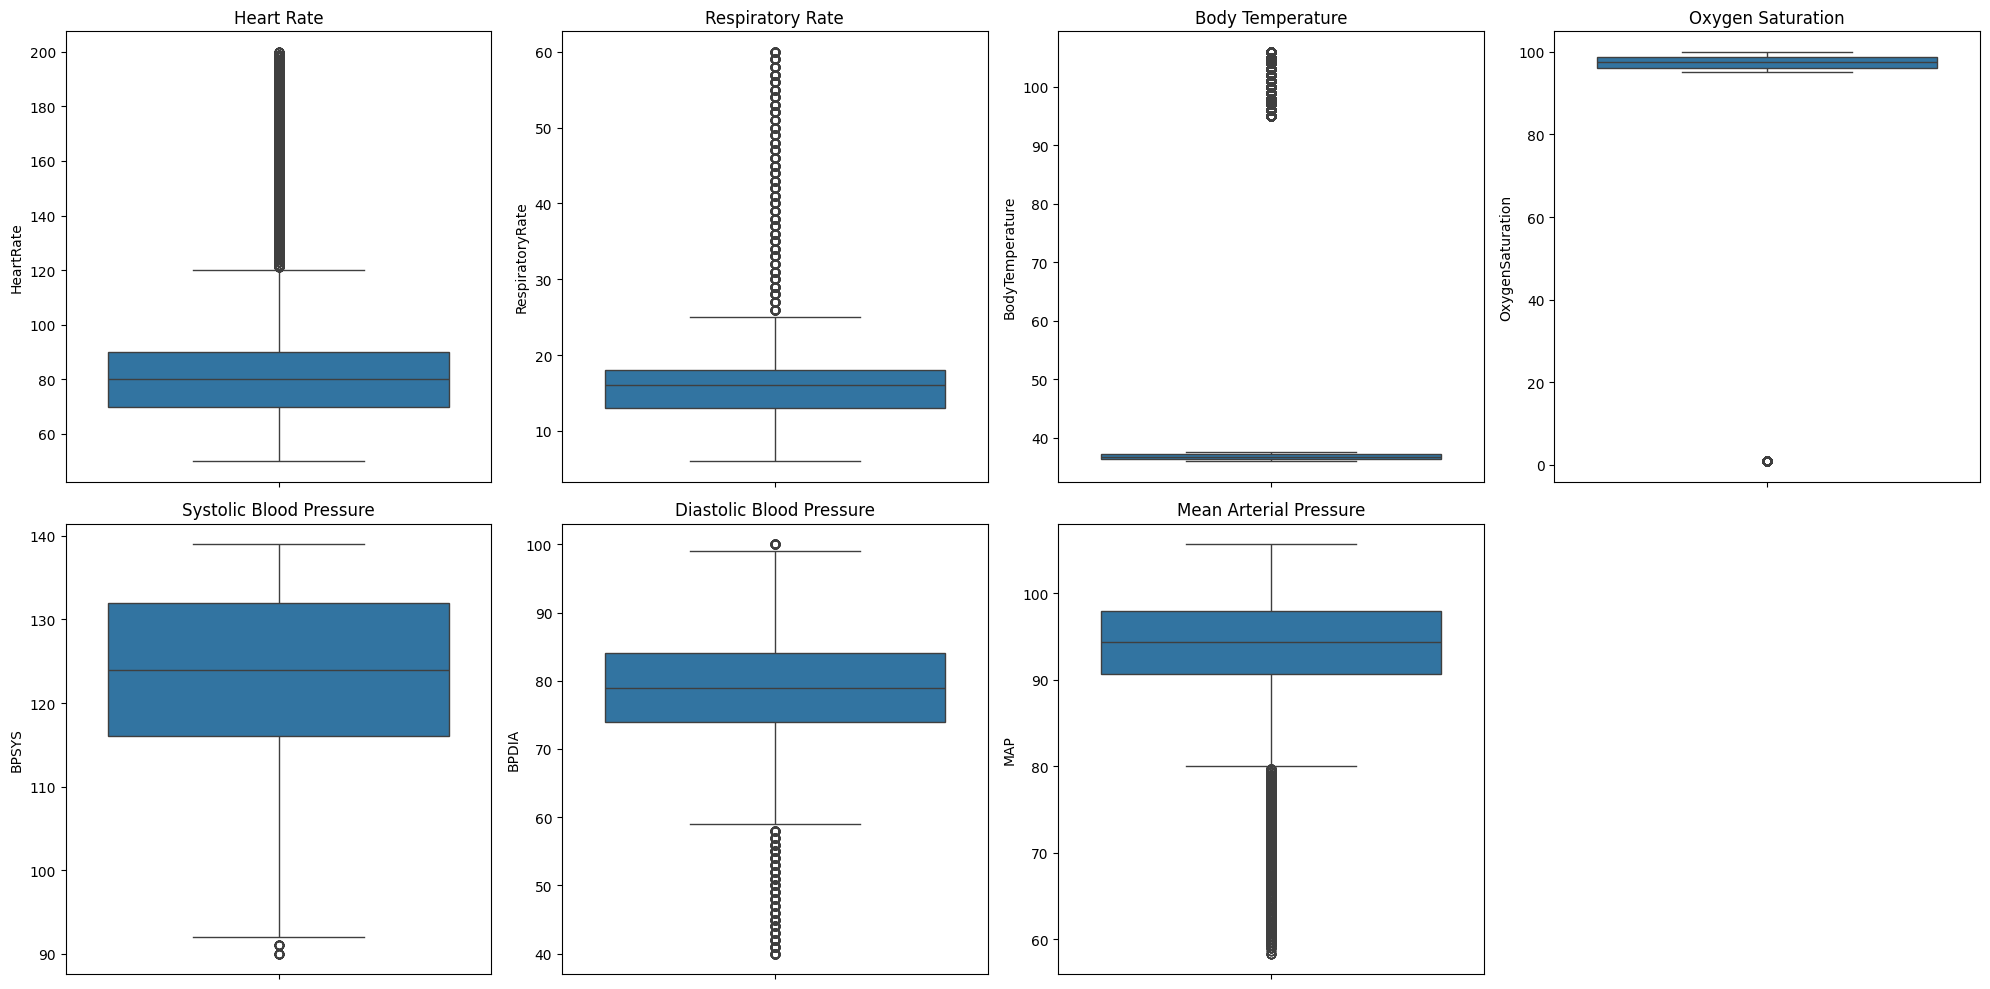

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data=dataset['HeartRate'], ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate')

sns.boxplot(data=dataset['RespiratoryRate'], ax=axes[0, 1])
axes[0, 1].set_title('Respiratory Rate')

sns.boxplot(data=dataset['BodyTemperature'], ax=axes[0, 2])
axes[0, 2].set_title('Body Temperature')

sns.boxplot(data=dataset['OxygenSaturation'], ax=axes[0, 3])
axes[0, 3].set_title('Oxygen Saturation')

sns.boxplot(data=dataset['BPSYS'], ax=axes[1, 0])
axes[1, 0].set_title('Systolic Blood Pressure')

sns.boxplot(data=dataset['BPDIA'], ax=axes[1, 1])
axes[1, 1].set_title('Diastolic Blood Pressure')

sns.boxplot(data=dataset['MAP'], ax=axes[1, 2])
axes[1, 2].set_title('Mean Arterial Pressure')

# Hide the empty subplot
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

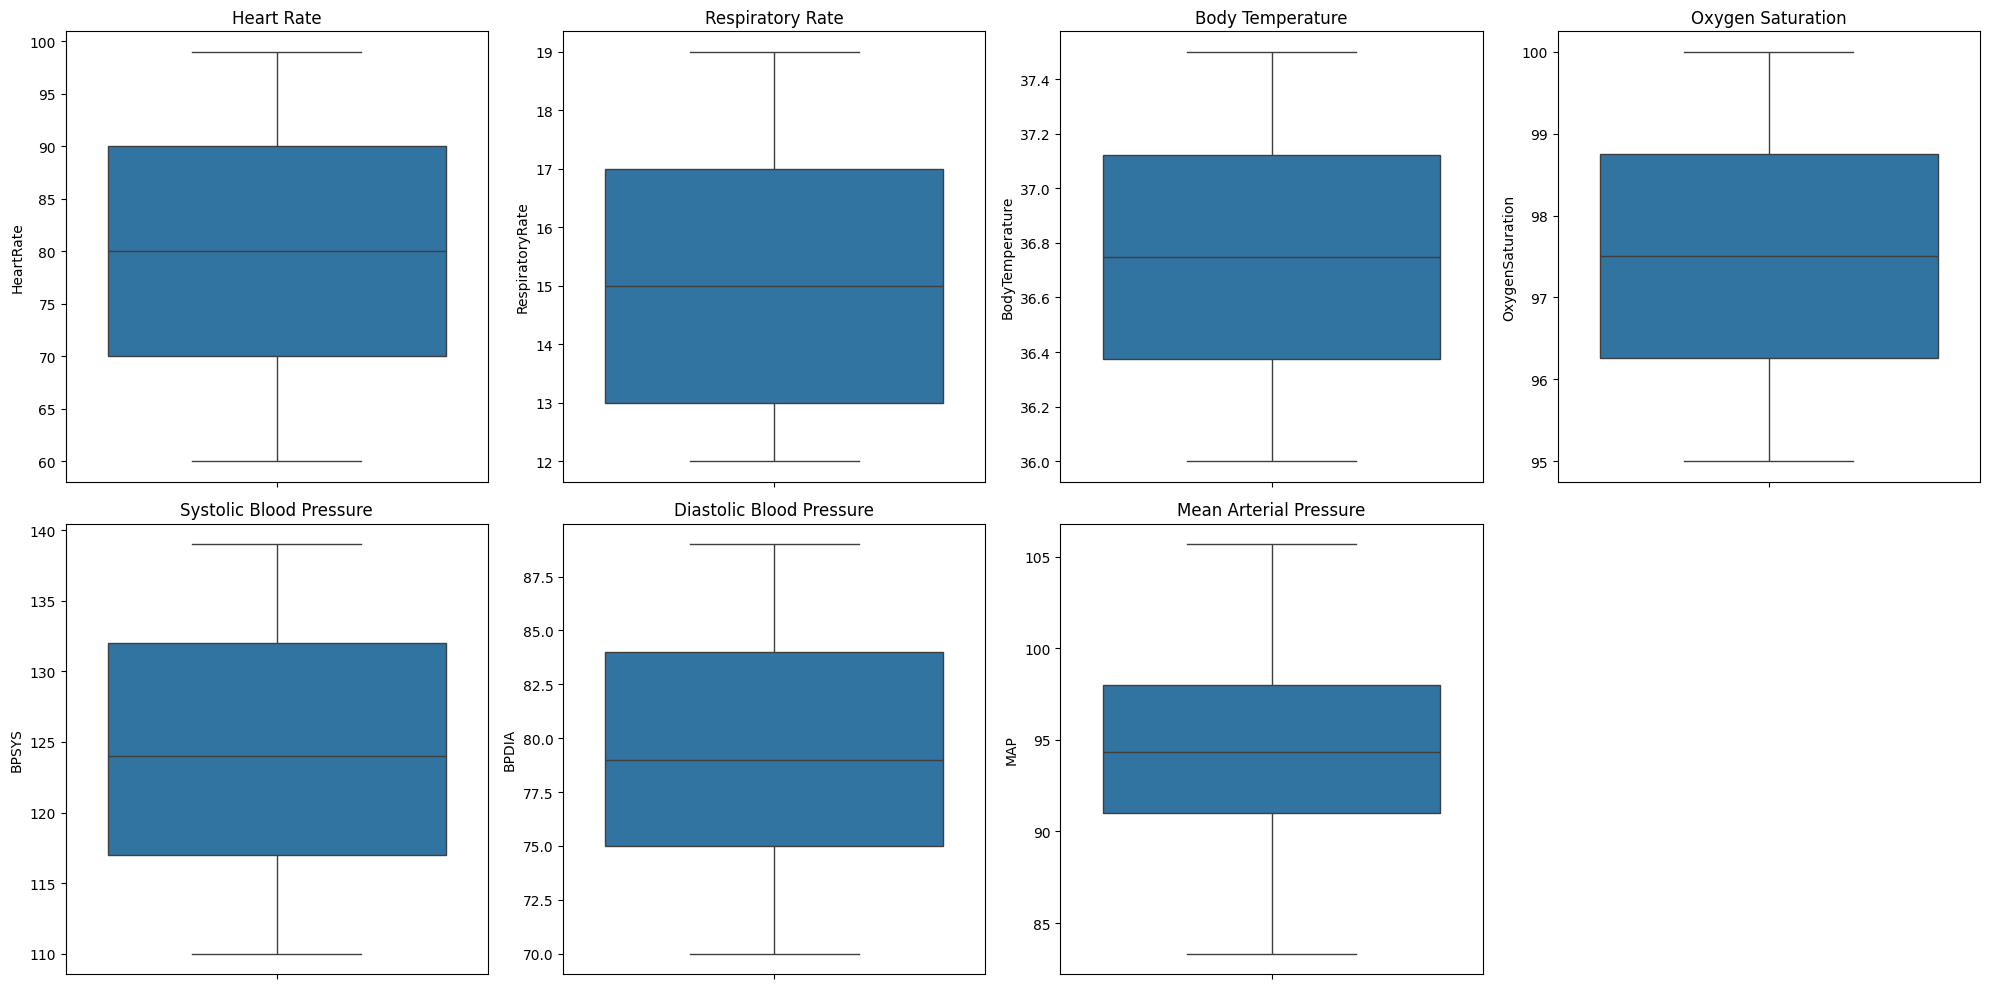

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numeric feature
numeric_columns = dataset.select_dtypes(include=['number']).columns
for column in numeric_columns:
    dataset = remove_outliers(dataset, column)

# Plotting boxplots for each feature after removing outliers
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

sns.boxplot(data=dataset['HeartRate'], ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate')

sns.boxplot(data=dataset['RespiratoryRate'], ax=axes[0, 1])
axes[0, 1].set_title('Respiratory Rate')

sns.boxplot(data=dataset['BodyTemperature'], ax=axes[0, 2])
axes[0, 2].set_title('Body Temperature')

sns.boxplot(data=dataset['OxygenSaturation'], ax=axes[0, 3])
axes[0, 3].set_title('Oxygen Saturation')

sns.boxplot(data=dataset['BPSYS'], ax=axes[1, 0])
axes[1, 0].set_title('Systolic Blood Pressure')

sns.boxplot(data=dataset['BPDIA'], ax=axes[1, 1])
axes[1, 1].set_title('Diastolic Blood Pressure')

sns.boxplot(data=dataset['MAP'], ax=axes[1, 2])
axes[1, 2].set_title('Mean Arterial Pressure')

# Hide the empty subplot
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

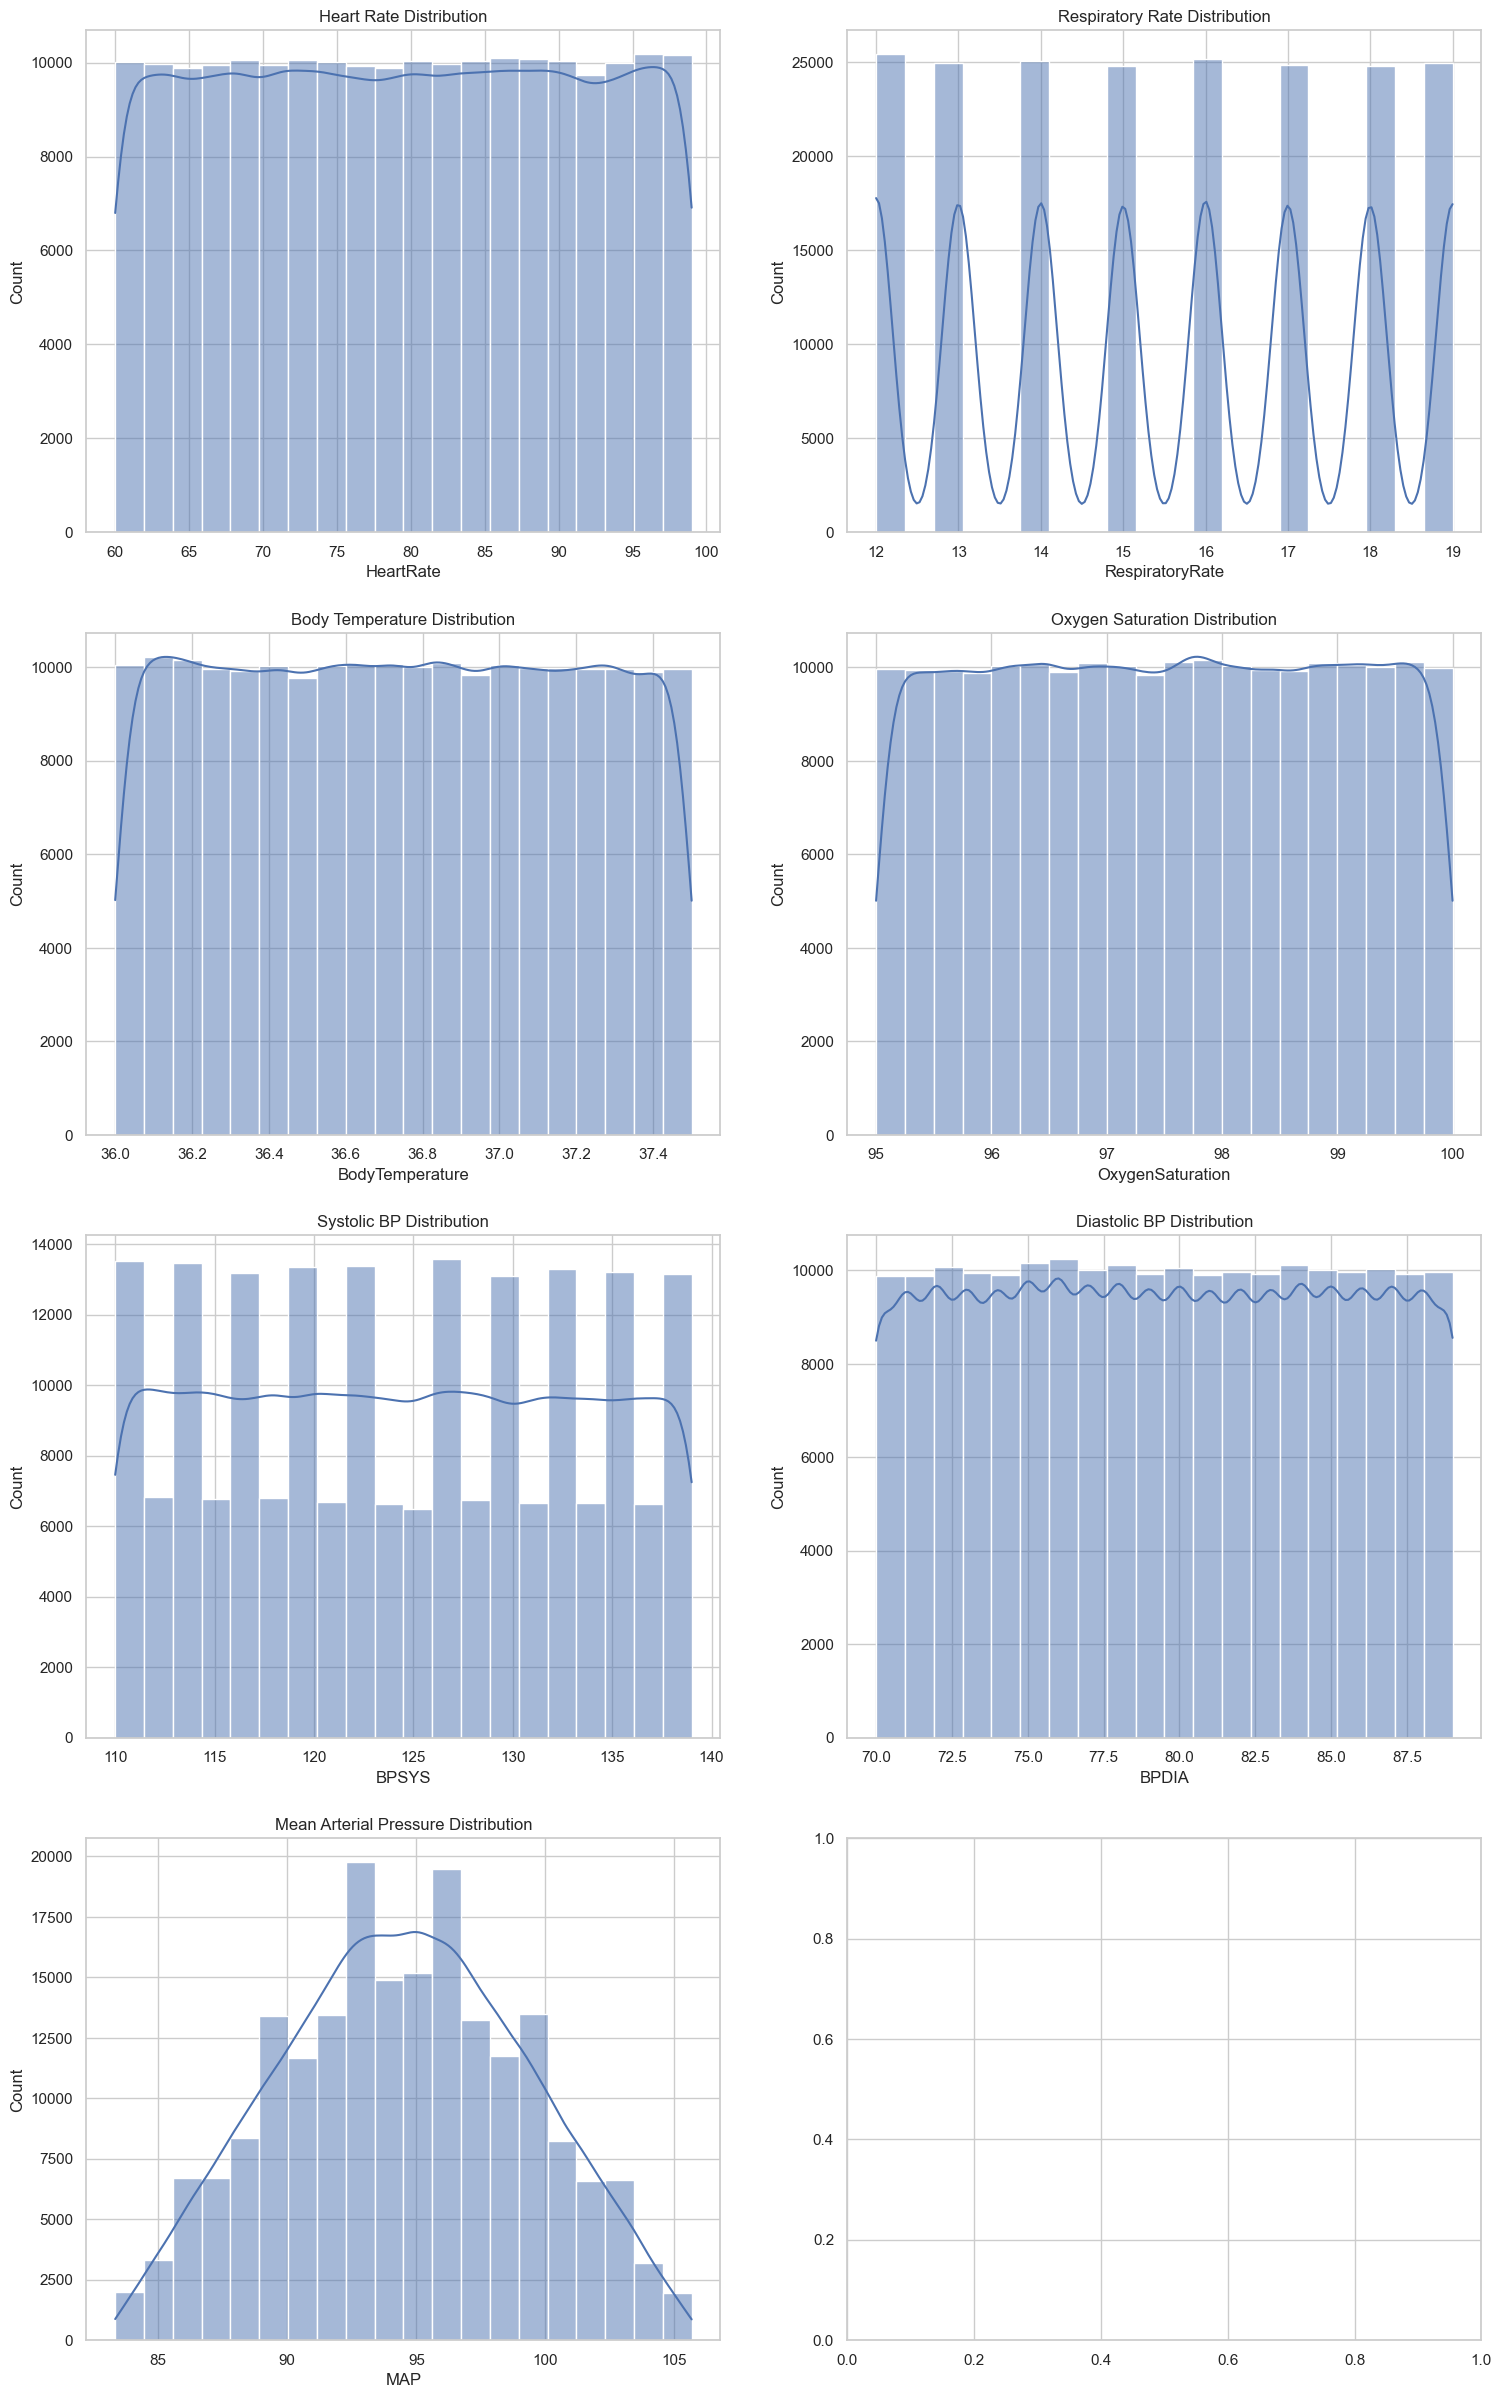

In [23]:
fig, axes = plt.subplots(4, 2, figsize=(18, 30))

sns.histplot(dataset['HeartRate'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate Distribution')

sns.histplot(dataset['RespiratoryRate'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Respiratory Rate Distribution')

sns.histplot(dataset['BodyTemperature'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Body Temperature Distribution')

sns.histplot(dataset['OxygenSaturation'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Oxygen Saturation Distribution')

sns.histplot(dataset['BPSYS'], bins=20, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Systolic BP Distribution')
sns.histplot(dataset['BPDIA'], bins=20, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Diastolic BP Distribution')

sns.histplot(dataset['MAP'], bins=20, kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Mean Arterial Pressure Distribution')

plt.show()

In [24]:
scaler = StandardScaler()
numerical_features = ['HeartRate', 'RespiratoryRate', 'OxygenSaturation', 'BodyTemperature', 'BPSYS', 'BPDIA', 'MAP']

dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

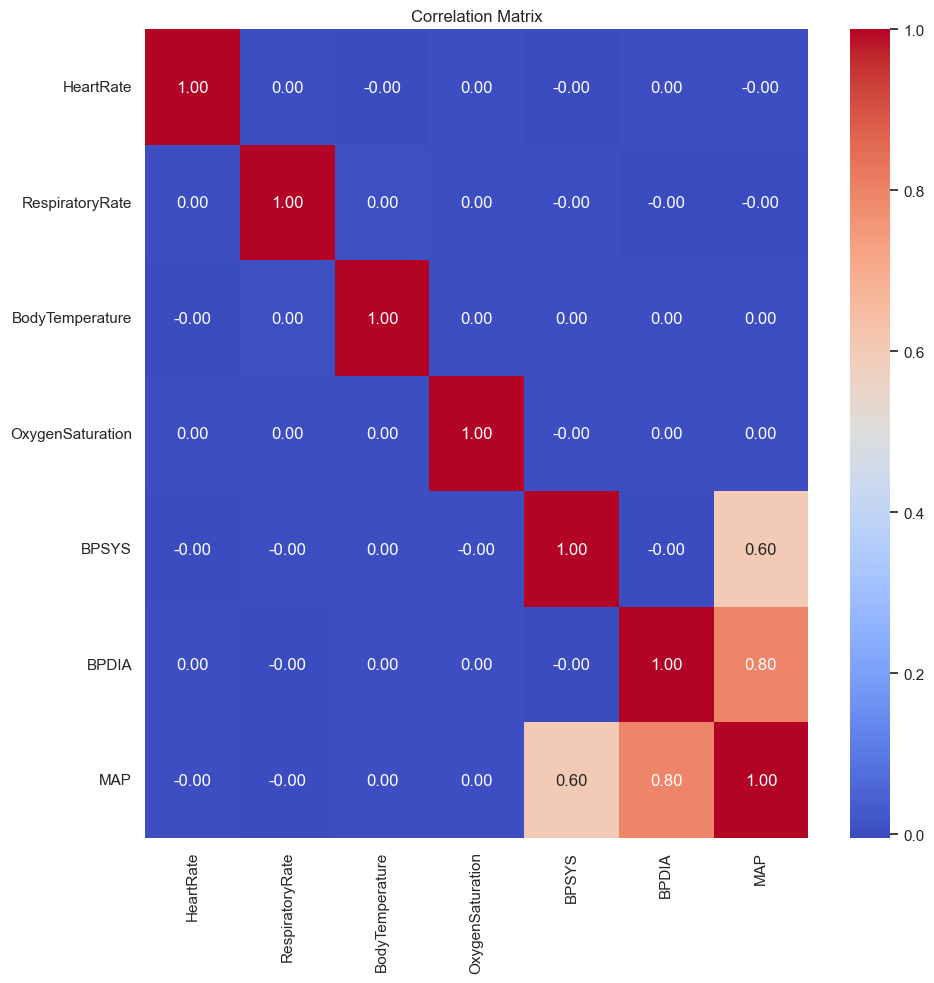

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

correlation_matrix = dataset[['HeartRate', 'RespiratoryRate', 'BodyTemperature', 'OxygenSaturation', 'BPSYS', 'BPDIA', 'MAP']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes)
axes.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

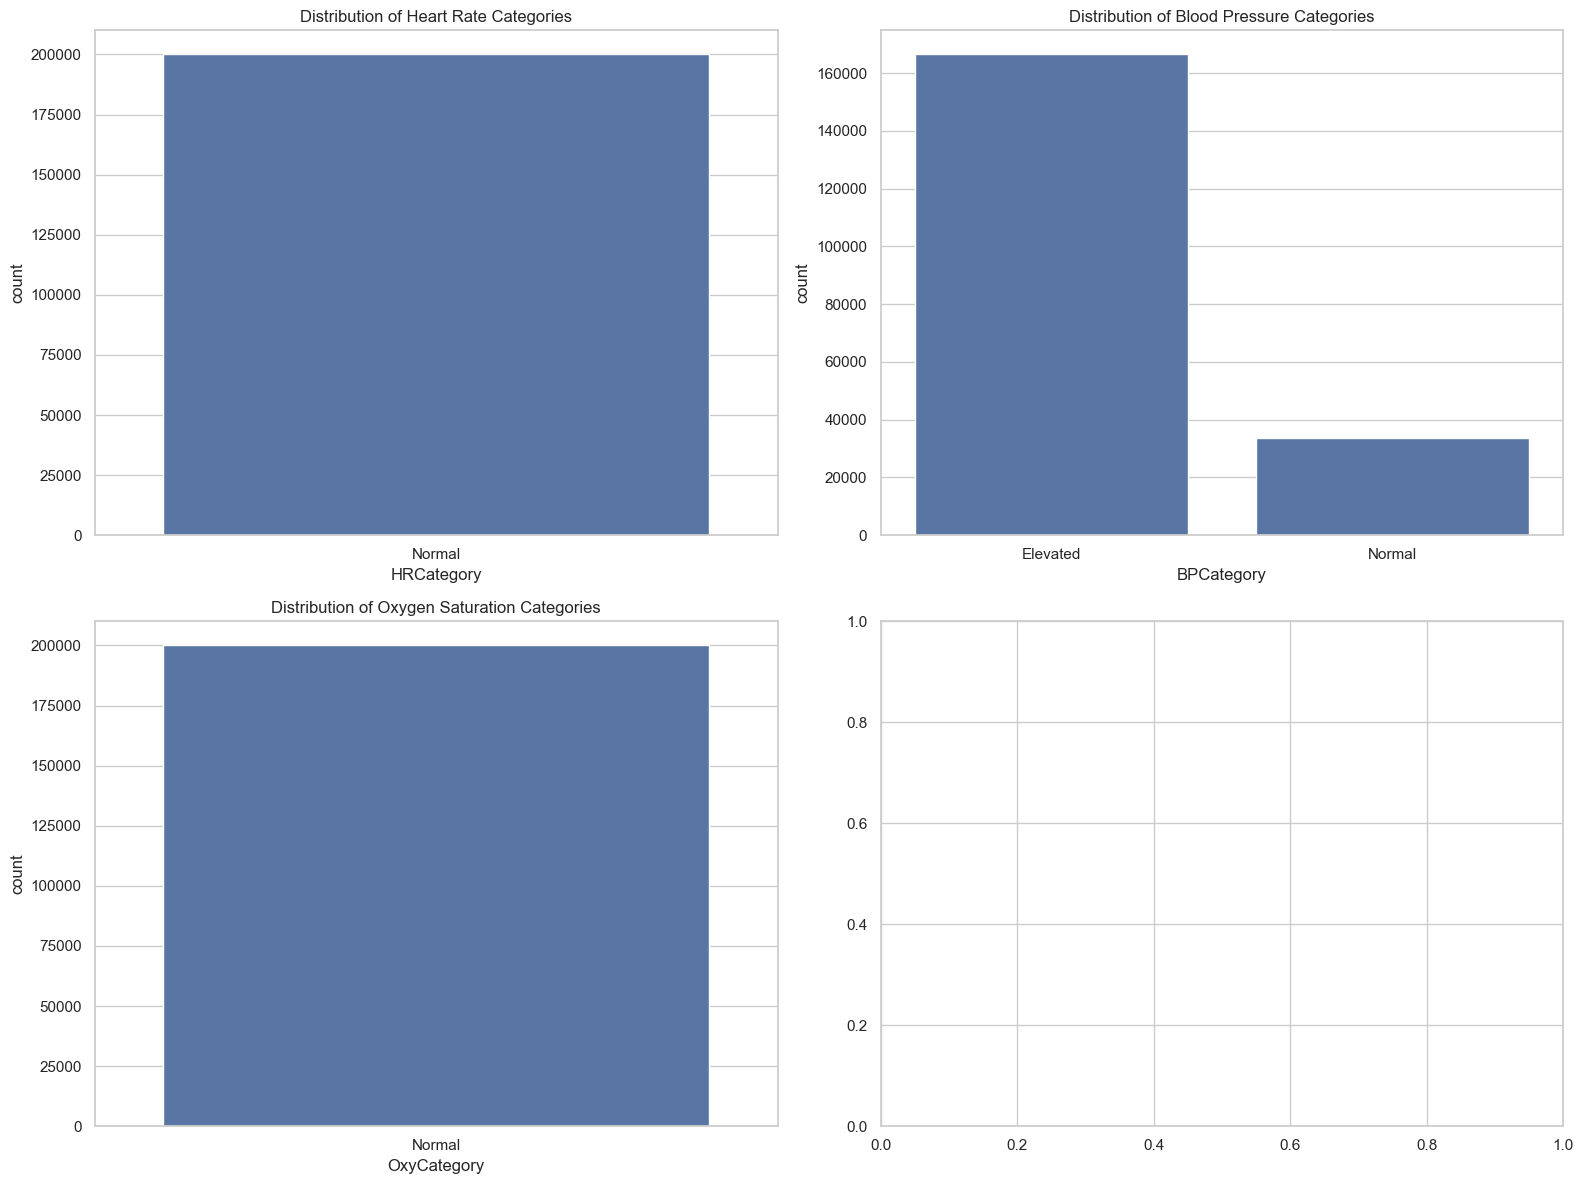

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(x='HRCategory', data=dataset, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Heart Rate Categories')

sns.countplot(x='BPCategory', data=dataset, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Blood Pressure Categories')

sns.countplot(x='OxyCategory', data=dataset, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Oxygen Saturation Categories')

plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [28]:
label_encoder = LabelEncoder()
dataset['BPCategory'] = label_encoder.fit_transform(dataset['BPCategory'])
dataset['HRCategory'] = label_encoder.fit_transform(dataset['HRCategory'])
dataset['OxyCategory'] = label_encoder.fit_transform(dataset['OxyCategory'])

In [29]:
dataset

# BPCAtegory : 0 - elevated, 1 - hypertension stage 1, 2 - hypertension stage 2, 3 - normal
# HRCategory : 0 - high, 1 - low, 2 - normal
# OxyCategory : 0 - low, 1 - normal

,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation,BPSYS,BPDIA,MAP,BPCategory,HRCategory,OxyCategory
0,-1.690814,-1.520811,0.261613,-1.249365,-0.050592,1.129080,0.872801,0,0,0
1,-1.431138,1.094175,-0.546333,-0.564926,0.180437,0.781691,0.733851,0,0,0
2,-1.431138,-0.213318,0.700908,0.695894,0.758009,-0.260477,0.247525,0,0,0
3,1.684972,0.222513,-0.216034,-1.727839,-0.743679,-1.302644,-1.489354,1,0,0
4,-0.911787,0.222513,0.523310,0.775977,1.566611,-0.607866,0.455950,0,0,0
...,...,...,...,...,...,...,...,...,...,...
200015,0.646269,0.658344,0.716732,-1.488223,-0.512650,0.781691,0.317000,0,0,0
200016,-0.305876,0.222513,-0.657118,1.272994,0.758009,1.650163,1.775978,0,0,0
200017,0.126917,-1.084980,-0.191272,0.427118,-0.050592,1.650163,1.289652,0,0,0
200018,0.300034,-1.084980,0.626648,-1.484788,0.064922,1.129080,0.942276,0,0,0


## KMeans Clustering

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than

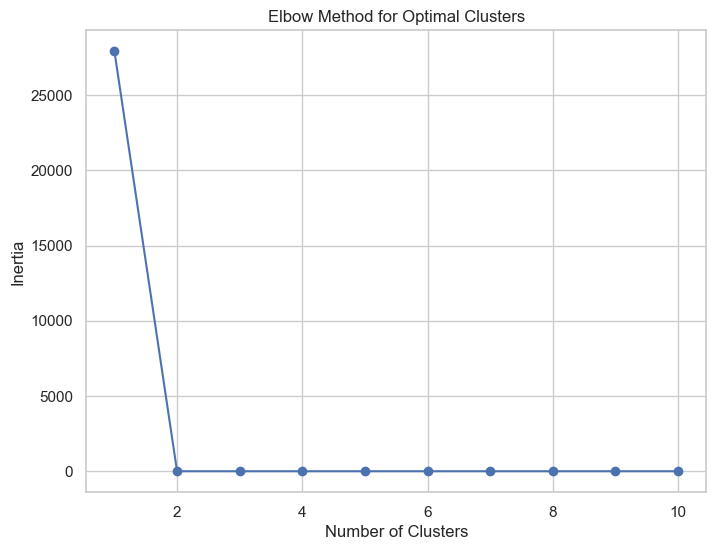

In [30]:
#Elbow Method

inertia = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(dataset[['BPCategory', 'HRCategory', 'OxyCategory']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [31]:
attributes = ['BPCategory', 'HRCategory', 'OxyCategory']

kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(dataset[attributes])
print("Cluster Assignments:")
print(dataset[['BPCategory', 'HRCategory', 'OxyCategory', 'Cluster']])
print("\nCentroids in Original Attribute Space:")
centroids = kmeans.cluster_centers_
cr = centroids.round()
centroids_df = pd.DataFrame(cr, columns=attributes)
print(centroids_df)

Cluster Assignments:
        BPCategory  HRCategory  OxyCategory  Cluster
0                0           0            0        0
1                0           0            0        0
2                0           0            0        0
3                1           0            0        1
4                0           0            0        0
...            ...         ...          ...      ...
200015           0           0            0        0
200016           0           0            0        0
200017           0           0            0        0
200018           0           0            0        0
200019           0           0            0        0

[200020 rows x 4 columns]

Centroids in Original Attribute Space:
   BPCategory  HRCategory  OxyCategory
0         0.0         0.0          0.0
1         1.0         0.0          0.0
2         0.0         0.0          0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


        BPCategory  HRCategory  OxyCategory  Cluster               Status
0                0           0            0        0  Frequent Monitoring
1                0           0            0        0  Frequent Monitoring
2                0           0            0        0  Frequent Monitoring
3                1           0            0        1        Normal Vitals
4                0           0            0        0  Frequent Monitoring
...            ...         ...          ...      ...                  ...
200015           0           0            0        0  Frequent Monitoring
200016           0           0            0        0  Frequent Monitoring
200017           0           0            0        0  Frequent Monitoring
200018           0           0            0        0  Frequent Monitoring
200019           0           0            0        0  Frequent Monitoring

[200020 rows x 5 columns]


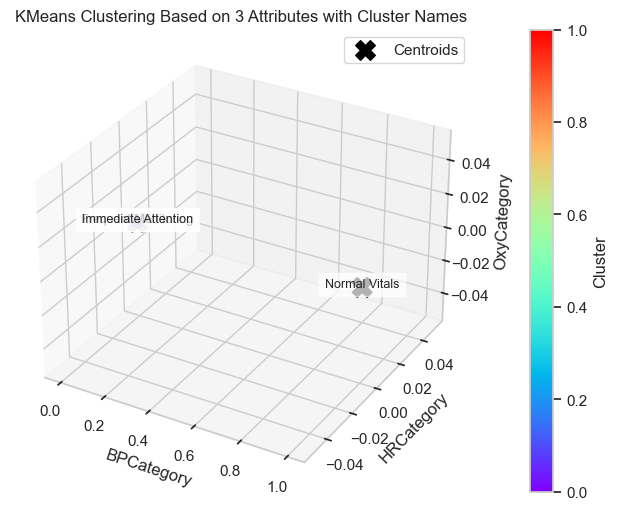

In [32]:
cluster_names = {
    0: 'Frequent Monitoring',
    1: 'Normal Vitals',
    2: 'Immediate Attention'
}

dataset['Status'] = dataset['Cluster'].map(cluster_names)

print(dataset[['BPCategory', 'HRCategory', 'OxyCategory', 'Cluster', 'Status']])

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(dataset['BPCategory'], 
                     dataset['HRCategory'], 
                     dataset['OxyCategory'], 
                     c=dataset['Cluster'], cmap='rainbow', s=50)

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           color='black', marker='X', s=200, label='Centroids')

for i, (x, y, z) in enumerate(centroids):
    ax.text(x, y, z, cluster_names[i], fontsize=9, ha='center', bbox=dict(facecolor='white', alpha=0.7))

ax.set_title("KMeans Clustering Based on 3 Attributes with Cluster Names")
ax.set_xlabel("BPCategory")
ax.set_ylabel("HRCategory")
ax.set_zlabel("OxyCategory")

plt.colorbar(scatter, label="Cluster")
plt.legend()
plt.show()


In [33]:
dataset.reset_index(drop=True, inplace=True)

In [34]:
dataset

,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation,BPSYS,BPDIA,MAP,BPCategory,HRCategory,OxyCategory,Cluster,Status
0,-1.690814,-1.520811,0.261613,-1.249365,-0.050592,1.129080,0.872801,0,0,0,0,Frequent Monitoring
1,-1.431138,1.094175,-0.546333,-0.564926,0.180437,0.781691,0.733851,0,0,0,0,Frequent Monitoring
2,-1.431138,-0.213318,0.700908,0.695894,0.758009,-0.260477,0.247525,0,0,0,0,Frequent Monitoring
3,1.684972,0.222513,-0.216034,-1.727839,-0.743679,-1.302644,-1.489354,1,0,0,1,Normal Vitals
4,-0.911787,0.222513,0.523310,0.775977,1.566611,-0.607866,0.455950,0,0,0,0,Frequent Monitoring
...,...,...,...,...,...,...,...,...,...,...,...,...
200015,0.646269,0.658344,0.716732,-1.488223,-0.512650,0.781691,0.317000,0,0,0,0,Frequent Monitoring
200016,-0.305876,0.222513,-0.657118,1.272994,0.758009,1.650163,1.775978,0,0,0,0,Frequent Monitoring
200017,0.126917,-1.084980,-0.191272,0.427118,-0.050592,1.650163,1.289652,0,0,0,0,Frequent Monitoring
200018,0.300034,-1.084980,0.626648,-1.484788,0.064922,1.129080,0.942276,0,0,0,0,Frequent Monitoring


In [35]:
cluster_counts = dataset['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
Cluster
0    166486
1     33534
Name: count, dtype: int64


In [36]:
cluster_0_data = dataset[dataset['Cluster'] == 2]     # Immediate Attention
cluster_0_data

,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation,BPSYS,BPDIA,MAP,BPCategory,HRCategory,OxyCategory,Cluster,Status


# Evaluation [ Silhouette Score]

In [37]:
#Closer to +1 → Well-clustered, good separation
#Near 0 → Overlapping clusters
#Closer to -1 → Misclassified points

In [38]:
grouped = dataset.groupby('Status')
sampled_data = grouped.apply(lambda x: x.sample(n=2000))
sampled_data.reset_index(drop=True, inplace=True)


sampled_data

/var/folders/yw/j75rfn2s66x7x3l88c7nwmj40000gp/T/ipykernel_1888/3930418191.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = grouped.apply(lambda x: x.sample(n=2000))


,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation,BPSYS,BPDIA,MAP,BPCategory,HRCategory,OxyCategory,Cluster,Status
0,-1.431138,-0.649149,0.649445,1.488920,0.295951,0.781691,0.803326,0,0,0,0,Frequent Monitoring
1,-1.258021,-1.084980,-1.720303,-0.172413,-0.397135,-1.650033,-1.558829,0,0,0,0,Frequent Monitoring
2,-0.652111,-1.084980,1.007698,1.222109,-1.552280,0.086912,-0.864078,0,0,0,0,Frequent Monitoring
3,1.684972,-1.520811,-0.896135,1.330681,1.682125,1.650163,2.331779,0,0,0,0,Frequent Monitoring
4,0.992503,1.530007,0.505700,-1.492047,-1.205737,1.302774,0.317000,0,0,0,0,Frequent Monitoring
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1.171462,1.530007,0.786786,-0.966576,-1.090222,-0.955255,-1.419879,1,0,0,1,Normal Vitals
3996,-1.604255,1.530007,-0.830597,-0.539166,-1.552280,-1.650033,-2.253581,1,0,0,1,Normal Vitals
3997,-0.132759,1.530007,-0.472632,-1.275450,-0.859193,-1.128949,-1.419879,1,0,0,1,Normal Vitals
3998,-1.258021,-0.649149,-0.112185,0.067973,-0.628164,-1.476338,-1.558829,1,0,0,1,Normal Vitals


In [39]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(sampled_data[attributes], sampled_data['Cluster'])

print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 1.000


# Testing on a new entry

In [40]:
bp_mapping = {"Elevated": 0, "Hypertension Stage 1": 1, "Hypertension Stage 2": 2, "Normal": 3}
hr_mapping = {"High": 0, "Low": 1, "Normal": 2}
oxy_mapping = {"Low": 0, "Normal": 1}

In [41]:
import numpy as np

def model(vitals_array):
    results = []

    for i in range(vitals_array.shape[0]):
        bpsys = vitals_array[i, 4]
        bpdia = vitals_array[i, 5]
        map_val = (2 * bpdia + bpsys) / 3

        v = np.append(vitals_array[i], [map_val])  

        BPCategory = bp_category(bpsys, bpdia)
        HRCategory = hr_category(vitals_array[i, 0])
        OxyCategory = oxy_category(vitals_array[i, 3])

        vl = [f'BP: {BPCategory}', f'HeartRate: {HRCategory}', f'Oxygen: {OxyCategory}']

        BPCategory = bp_mapping[BPCategory]
        HRCategory = hr_mapping[HRCategory]
        OxyCategory = oxy_mapping[OxyCategory]

        vitals = [[BPCategory, HRCategory, OxyCategory]]

        cluster_prediction = kmeans.predict(vitals)
        predicted_status = cluster_names[cluster_prediction[0]]

        res = f"\nTest Case {i+1}: {vl} → {predicted_status} (Cluster {cluster_prediction[0]})\n\n"
        results.append(res)

    return "\n".join(results) 

In [42]:
test_vitals = np.array([
    [72, 16, 36.6, 98, 120, 80],
    [85, 20, 37.1, 92, 140, 90],
    [60, 14, 35.9, 95, 110, 70],
    [110, 28, 39.5, 85, 180, 120]])

result = model(test_vitals)
print(result)


Test Case 1: ['BP: Elevated', 'HeartRate: Normal', 'Oxygen: Normal'] → Frequent Monitoring (Cluster 0)



Test Case 2: ['BP: Hypertension Stage 1', 'HeartRate: Normal', 'Oxygen: Low'] → Normal Vitals (Cluster 1)



Test Case 3: ['BP: Normal', 'HeartRate: Normal', 'Oxygen: Normal'] → Normal Vitals (Cluster 1)



Test Case 4: ['BP: Hypertension Stage 2', 'HeartRate: High', 'Oxygen: Low'] → Normal Vitals (Cluster 1)




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# DBSCAN

      BPCategory  HRCategory  OxyCategory  DBSCAN_Cluster     Status
0              0           0            0               0  Cluster 0
1              0           0            0               0  Cluster 0
2              0           0            0               0  Cluster 0
3              0           0            0               0  Cluster 0
4              0           0            0               0  Cluster 0
...          ...         ...          ...             ...        ...
3995           1           0            0               1  Cluster 1
3996           1           0            0               1  Cluster 1
3997           1           0            0               1  Cluster 1
3998           1           0            0               1  Cluster 1
3999           1           0            0               1  Cluster 1

[4000 rows x 5 columns]


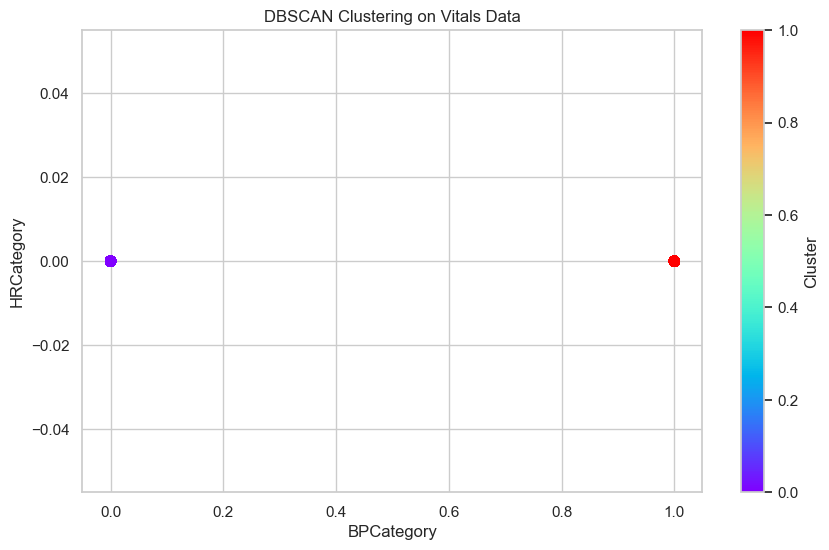

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data = sampled_data[["BPCategory", "HRCategory", "OxyCategory"]].values 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

dbscan = DBSCAN(eps=0.5, min_samples=3)
sampled_data["DBSCAN_Cluster"] = dbscan.fit_predict(scaled_data)

sampled_data["Status"] = sampled_data["DBSCAN_Cluster"].apply(lambda x: "Noise" if x == -1 else "Cluster " + str(x))

print(sampled_data[["BPCategory", "HRCategory", "OxyCategory", "DBSCAN_Cluster", "Status"]])

plt.figure(figsize=(10, 6))
plt.scatter(sampled_data["BPCategory"], sampled_data["HRCategory"], c=sampled_data["DBSCAN_Cluster"], cmap="rainbow", s=50)
plt.xlabel("BPCategory")
plt.ylabel("HRCategory")
plt.title("DBSCAN Clustering on Vitals Data")
plt.colorbar(label="Cluster")
plt.show()

In [44]:
cluster_summary = sampled_data.groupby("DBSCAN_Cluster")[["BPCategory", "HRCategory", "OxyCategory"]].mean()
print(cluster_summary)

                BPCategory  HRCategory  OxyCategory
DBSCAN_Cluster                                     
0                      0.0         0.0          0.0
1                      1.0         0.0          0.0


In [45]:
dbscan_cluster_names = {
    -1: "Anomalies/Noise (Irregular Vitals)",
    0: "Slightly Elevated BP, Stable Condition",
    1: "High HR & Low Oxygen - Critical",
    2: "Normal BP, High HR & Low Oxygen - Respiratory Distress",
    3: "Hypertension & High HR - Risk of Stroke",
    4: "Normal BP, Low HR & Low Oxygen - Possible Hypoxia",
    5: "Severe Hypertension & High HR - Critical Risk",
    6: "Hypertension & Low HR - Bradycardia Concern",
    7: "Completely Healthy Vitals",
    8: "Normal BP, Normal HR, Low Oxygen - Mild Hypoxia"
}

sampled_data["DBSCAN_Status"] = sampled_data["DBSCAN_Cluster"].map(dbscan_cluster_names)

print(sampled_data[['BPCategory', 'HRCategory', 'OxyCategory', 'DBSCAN_Cluster', 'DBSCAN_Status']])


      BPCategory  HRCategory  OxyCategory  DBSCAN_Cluster  \
0              0           0            0               0   
1              0           0            0               0   
2              0           0            0               0   
3              0           0            0               0   
4              0           0            0               0   
...          ...         ...          ...             ...   
3995           1           0            0               1   
3996           1           0            0               1   
3997           1           0            0               1   
3998           1           0            0               1   
3999           1           0            0               1   

                               DBSCAN_Status  
0     Slightly Elevated BP, Stable Condition  
1     Slightly Elevated BP, Stable Condition  
2     Slightly Elevated BP, Stable Condition  
3     Slightly Elevated BP, Stable Condition  
4     Slightly Elevated BP, Stab

In [46]:
from sklearn.metrics import silhouette_score

filtered_data = sampled_data[sampled_data["DBSCAN_Cluster"] != -1]

features = filtered_data[['BPCategory', 'HRCategory', 'OxyCategory']]

labels = filtered_data["DBSCAN_Cluster"]

sil_score = silhouette_score(features, labels)

print(f"Silhouette Score for DBSCAN Clustering: {sil_score:.4f}")

Silhouette Score for DBSCAN Clustering: 1.0000
